<a href="https://colab.research.google.com/github/Applied-Machine-Learning-2022/final-project-jep-ua/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9 
!pip install imutils
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
#Importing the data to train the model
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d andrewmvd/car-plate-detection
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

 99% 201M/203M [00:01<00:00, 168MB/s]
100% 203M/203M [00:01<00:00, 124MB/s]
Done


In [31]:
import zipfile
import os

with zipfile.ZipFile('car-plate-detection.zip','r') as z:
  z.extractall('./')

os.listdir()

['.config',
 'images',
 'annotations',
 '.ipynb_checkpoints',
 'car-plate-detection.zip',
 'sample_data']

In [ ]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = 



In [51]:
ds = tf.keras.utils.image_dataset_from_directory(
  ".",
  validation_split=0.3,
  subset="training",
  seed=123,
  batch_size=32,
  shuffle=True
)


for image_batch, labels_batch in ds:
  print(image_batch.shape)
  print(labels_batch.shape)

  break

Found 433 files belonging to 5 classes.
Using 304 files for training.
(32, 256, 256, 3)
(32,)


In [49]:
433 * 0.7

303.09999999999997

In [40]:
import cv2

s = set()
for i in range(433):
  s.add(cv2.imread("images/Cars{}.png".format(i)).shape)

s

{(141, 400, 3),
 (151, 400, 3),
 (176, 400, 3),
 (185, 400, 3),
 (190, 400, 3),
 (192, 400, 3),
 (196, 400, 3),
 (197, 400, 3),
 (198, 400, 3),
 (200, 400, 3),
 (201, 400, 3),
 (204, 400, 3),
 (205, 400, 3),
 (209, 400, 3),
 (210, 400, 3),
 (215, 400, 3),
 (218, 400, 3),
 (220, 415, 3),
 (221, 400, 3),
 (223, 300, 3),
 (225, 300, 3),
 (225, 400, 3),
 (226, 400, 3),
 (227, 323, 3),
 (229, 558, 3),
 (230, 400, 3),
 (232, 500, 3),
 (233, 400, 3),
 (234, 500, 3),
 (238, 400, 3),
 (240, 400, 3),
 (242, 400, 3),
 (242, 431, 3),
 (243, 400, 3),
 (244, 400, 3),
 (245, 400, 3),
 (246, 400, 3),
 (247, 400, 3),
 (248, 400, 3),
 (250, 400, 3),
 (251, 400, 3),
 (253, 400, 3),
 (255, 400, 3),
 (256, 400, 3),
 (259, 400, 3),
 (260, 320, 3),
 (260, 400, 3),
 (262, 400, 3),
 (262, 508, 3),
 (263, 350, 3),
 (265, 400, 3),
 (266, 400, 3),
 (267, 400, 3),
 (268, 400, 3),
 (268, 500, 3),
 (270, 400, 3),
 (270, 450, 3),
 (270, 471, 3),
 (275, 553, 3),
 (276, 320, 3),
 (279, 400, 3),
 (281, 400, 3),
 (284, 4

In [27]:
import PIL
from PIL import Image
import numpy as np
import cv2
import pytesseract

image = cv2.imread("license_plate.jpg")
pytesseract.pytesseract.tesseract_cmd = r"/usr/bin/tesseract" #r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Grayscale, Gaussian blur, Otsu's threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

cv2.imwrite("thresh.jpg", thresh)
# cv2.imshow('thresh', thresh)
# cv2.imshow('opening', opening)
# cv2.imshow('invert', invert)
cv2.waitKey()


» * Arkansas’ ii
514 KZE



-1

In [26]:
# ! which tesseract

/usr/bin/tesseract


In [2]:
#read in frames
# import cv2 as cv
# import pytesseract
# cars_video = cv.VideoCapture('cars.mp4')


# height = int(cars_video.get(cv.CAP_PROP_FRAME_HEIGHT))
# width = int(cars_video.get(cv.CAP_PROP_FRAME_WIDTH))
# fps = cars_video.get(cv.CAP_PROP_FPS)
# total_frames = int(cars_video.get(cv.CAP_PROP_FRAME_COUNT))

# cars_video = cv.VideoCapture('cars.mp4')

# total_frames = int(cars_video.get(cv.CAP_PROP_FRAME_COUNT))

# frames_read = 0

# for current_frame in range(0, total_frames):
#   cars_video.set(cv.CAP_PROP_POS_FRAMES, current_frame)
#   ret, _ = cars_video.read()
#   if not ret:
#     raise Exception(f'Problem reading frame {current_frame} from video')
#   if (current_frame+1) % 50 == 0:
#     print(f'Read {current_frame+1} frames so far')

# cars_video.release()



In [24]:
from PIL import Image
import PIL
import numpy as np
import cv2
import pytesseract
# image = cv.imread("license_plate.jpg")

# image = Image.open("HT_ArkansasTag.png")
# image = Image.new("P", (100, 100))
# image= np.zeros((1, 1, 100))
# pytesseract.image_to_string(image)

# import cv2
# image = cv2.imread("HT_ArkansasTag.png")
# image = cv2.resize(image, (600, 360))
# words = pytesseract.image_to_string(image)
# image.shape
# print(words)

# gray_image = cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# gray_image = cv2.bilateralFilter(gray_image,11,17,17)

# edged = cv2.Canny(gray_image,30,200)
# cnts,new = cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# # image = Image.open("license_plate.jpg")
# cnts = sorted(cnts,key = cv2.contourArea,reverse = True) [:30]
# screenCnt = None

# #Finding the contour with four sides
# i=7
# for c in cnts:
#   perimeter = cv2.arcLength(c,True)
#   approx = cv2.approxPolyDP(c,0.018*perimeter,True)
#   if len(approx)==4:
#     screenCnt = approx

# x,y,w,h = cv2.boundingRect(c)
# new_img = image[y:y+h,x:x+w]
# cv2.imwrite('./'+str(i)+'.png',new_img)

image = cv2.imread("license_plate.jpg")
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Grayscale, Gaussian blur, Otsu's threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

cv2.imwrite("thresh.jpg", thresh)
# cv2.imshow('thresh', thresh)
# cv2.imshow('opening', opening)
# cv2.imshow('invert', invert)
cv2.waitKey()


TesseractNotFoundError: ignored

In [57]:
from PIL import Image
import PIL
import numpy as np
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt
import urllib.request
import os
import tarfile
import shutil
import tensorflow as tf

base_url = 'http://download.tensorflow.org/models/object_detection/'
file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'

url = base_url + file_name

urllib.request.urlretrieve(url, file_name)

os.listdir()

dir_name = file_name[0:-len('.tar.gz')]

if os.path.exists(dir_name):
  shutil.rmtree(dir_name) 

tarfile.open(file_name, 'r:gz').extractall('./')

os.listdir(dir_name)

frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')

with tf.io.gfile.GFile(frozen_graph, "rb") as f:
  graph_def = tf.compat.v1.GraphDef()
  loaded = graph_def.ParseFromString(f.read())

cars_video = cv.VideoCapture('cars.mp4')
height = int(cars_video.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(cars_video.get(cv.CAP_PROP_FRAME_WIDTH))
fps = cars_video.get(cv.CAP_PROP_FPS)
total_frames = int(cars_video.get(cv.CAP_PROP_FRAME_COUNT))

frames_read = 0

r = 255
g = 0
b = 0
scale = .5
thickness = 1

outputs = (
  'num_detections:0',
  'detection_classes:0',
  'detection_scores:0',
  'detection_boxes:0',
)

def wrap_graph(graph_def, inputs, outputs, print_graph=False):
  wrapped = tf.compat.v1.wrap_function(
    lambda: tf.compat.v1.import_graph_def(graph_def, name=""), [])

  return wrapped.prune(
    tf.nest.map_structure(wrapped.graph.as_graph_element, inputs),
    tf.nest.map_structure(wrapped.graph.as_graph_element, outputs))


model = wrap_graph(graph_def=graph_def,
                   inputs=["image_tensor:0"],
                   outputs=outputs)
model.outputs

fourcc = cv.VideoWriter_fourcc(*'mp4v')

while (True):
  # cars_video.set(cv.CAP_PROP_POS_FRAMES, current_frame)
  ret, image = cars_video.read()
  if (not ret):
    break 
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  h, w, _ = image.shape
  input_images = [image]
  tensor = tf.convert_to_tensor(input_images, dtype=tf.uint8)

  detections = model(tensor)

  for i, box in enumerate(detections[3][0]):
    if detections[1][0][i] == 18:
       x1, y1, x2, y2 = int(box[1]*w), int(box[0]*h), int(box[3]*w), int(box[2]*h)
       car = image[y1:y2, x1:x2]

       gray = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)
       blur = cv2.GaussianBlur(gray, (3,3), 0)
       thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
       
       # Morph open to remove noise and invert image
       kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
       opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
       invert = 255 - opening
       
       # Perform text extraction
       data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
       if data ==[]:
         continue
       else:
        print(data)



0

In [1]:
import zipfile
import os

with zipfile.ZipFile('License-Plate-Recognition-master.zip','r') as z:
  z.extractall('./')

os.listdir()

['.config',
 'License-Plate-Recognition-master.zip',
 'predict.py',
 'License-Plate-Recognition-master',
 'sample_data']

In [7]:
!cd License-Plate-Recognition-master; python predict.py

Traceback (most recent call last):
  File "predict.py", line 544, in <module>
    r, roi, color = c.predict("2.jpg")
  File "predict.py", line 245, in predict
    img = imreadex(car_pic)
  File "predict.py", line 14, in imreadex
    return cv2.imdecode(np.fromfile(filename, dtype=np.uint8), cv2.IMREAD_COLOR)
FileNotFoundError: [Errno 2] No such file or directory: '2.jpg'


In [8]:
import sys
sys.path.append("/content/License-Plate-Recognition-master")
from predict import *

In [2]:
!ls

car.jpeg     License-Plate-Recognition-master	   __pycache__
images.jpeg  License-Plate-Recognition-master.zip  sample_data


h,w: 300 521
len(contours) 3
2
精确定位
blue
3413 136 16 642 0 4418
no
4188 98 86 520 306 22599


Exception ignored in: <function CardPredictor.__del__ at 0x7f33d736add0>
Traceback (most recent call last):
  File "/content/License-Plate-Recognition-master/predict.py", line 147, in __del__
  File "/content/License-Plate-Recognition-master/predict.py", line 202, in save_traindata
AttributeError: 'CardPredictor' object has no attribute 'model'


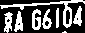

In [4]:
from predict import *
from google.colab.patches import cv2_imshow
c = CardPredictor()
gray_img = c.predict('/content/License-Plate-Recognition-master/test/car5.jpg')
# cv2_imshow('ec.png', plate_img[1])
# cv2_imshow(plate_img[1])
# plate_img[3].shape
import matplotlib.pyplot as plt
cv2_imshow(gray_img)

In [1]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9 
!pip install imutils
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Final Code
from PIL import Image
import PIL
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt
import urllib.request
import os
import tarfile
import shutil
import tensorflow as tf
from numpy.linalg import norm
import sys
import  os
import json
from google.colab.patches import cv2_imshow


SZ  =  20           #training picture length and width
MAX_WIDTH  =  1000 #Original  image maximum width
Min_Area  =  2000 #The   maximum allowable area of ​​the license plate area
PROVINCE_START = 1000


base_url = 'http://download.tensorflow.org/models/object_detection/'
file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'

url = base_url + file_name

urllib.request.urlretrieve(url, file_name)

os.listdir()

dir_name = file_name[0:-len('.tar.gz')]

if os.path.exists(dir_name):
  shutil.rmtree(dir_name) 

tarfile.open(file_name, 'r:gz').extractall('./')

os.listdir(dir_name)

frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')

with tf.io.gfile.GFile(frozen_graph, "rb") as f:
  graph_def = tf.compat.v1.GraphDef()
  loaded = graph_def.ParseFromString(f.read())

cars_video = cv2.VideoCapture('cars.mp4')
height = int(cars_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cars_video.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cars_video.get(cv2.CAP_PROP_FPS)
total_frames = int(cars_video.get(cv2.CAP_PROP_FRAME_COUNT))

frames_read = 0

r = 255
g = 0
b = 0
scale = .5
thickness = 1

outputs = (
  'num_detections:0',
  'detection_classes:0',
  'detection_scores:0',
  'detection_boxes:0',
)

def wrap_graph(graph_def, inputs, outputs, print_graph=False):
  wrapped = tf.compat.v1.wrap_function(
    lambda: tf.compat.v1.import_graph_def(graph_def, name=""), [])

  return wrapped.prune(
    tf.nest.map_structure(wrapped.graph.as_graph_element, inputs),
    tf.nest.map_structure(wrapped.graph.as_graph_element, outputs))


model = wrap_graph(graph_def=graph_def,
                   inputs=["image_tensor:0"],
                   outputs=outputs)
model.outputs


def point_limit(point):
    if point[0] < 0:
        point[0] = 0
    if point[1] < 0:
        point[1] = 0


def accurate_place(card_img_hsv, limit1, limit2, color):
    row_num, col_num = card_img_hsv.shape[:2]
    xl = col_num
    xr = 0
    yh = 0
    yl = row_num
    #col_num_limit = self.cfg["col_num_limit"]
    row_num_limit = 18
    col_num_limit = col_num * 0.8 if color != "green" else col_num * 0.5#绿色有渐变
    for i in range(row_num):
        count = 0
        for j in range(col_num):
            H = card_img_hsv.item(i, j, 0)
            S = card_img_hsv.item(i, j, 1)
            V = card_img_hsv.item(i, j, 2)
            if limit1 < H <= limit2 and 34 < S and 46 < V:
                count += 1
        if count > col_num_limit:
            if yl > i:
                yl = i
            if yh < i:
                yh = i
    for j in range(col_num):
        count = 0
        for i in range(row_num):
            H = card_img_hsv.item(i, j, 0)
            S = card_img_hsv.item(i, j, 1)
            V = card_img_hsv.item(i, j, 2)
            if limit1 < H <= limit2 and 34 < S and 46 < V:
                count += 1
        if count > row_num - row_num_limit:
            if xl > j:
                xl = j
            if xr < j:
                xr = j
    return xl, xr, yh, yl


fourcc = cv2.VideoWriter_fourcc(*'mp4v')

for i in range(0, int(cars_video.get(cv2.CAP_PROP_FRAME_COUNT)),50):
  # cars_video.set(cv.CAP_PROP_POS_FRAMES, current_frame)
  ret, img = cars_video.read()
  # img = cv2.imread("/content/License-Plate-Recognition-master/test/car5.jpg")
  if (not ret):
    break 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  h, w, _ = img.shape
  input_images = [img]
  tensor = tf.convert_to_tensor(input_images, dtype=tf.uint8)

  detections = model(tensor)
  # print(detections)
  for i, box in enumerate(detections[3][0]):
    if True:
        img = cv2.imread("/content/License-Plate-Recognition-master/test/car5.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pic_hight, pic_width = img.shape[:2]
        if pic_width > MAX_WIDTH:
            pic_rate = MAX_WIDTH / pic_width
            img = cv2.resize(img, (MAX_WIDTH, int(pic_hight*pic_rate)), interpolation=cv2.INTER_LANCZOS4)

        print("h,w:", pic_hight, pic_width)
        blur = 3
        #高斯去噪
        if blur > 0:
            img = cv2.GaussianBlur(img, (blur, blur), 0)#图片分辨率调整
        oldimg = img
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        kernel = np.ones((20, 20), np.uint8)
        img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        img_opening = cv2.addWeighted(img, 1, img_opening, -1, 0);

        #找到图像边缘
        ret, img_thresh = cv2.threshold(img_opening, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        img_edge = cv2.Canny(img_thresh, 100, 200)
        #使用开运算和闭运算让图像边缘成为一个整体
        kernel = np.ones((5, 12), np.uint8)
        img_edge1 = cv2.morphologyEx(img_edge, cv2.MORPH_CLOSE, kernel)
        img_edge2 = cv2.morphologyEx(img_edge1, cv2.MORPH_OPEN, kernel)

        #查找图像边缘整体形成的矩形区域，可能有很多，车牌就在其中一个矩形区域中
        try:
            contours, hierarchy = cv2.findContours(img_edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        except ValueError:
            image, contours, hierarchy = cv2.findContours(img_edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = [cnt for cnt in contours if cv2.contourArea(cnt) > Min_Area]
        print('len(contours)', len(contours))
        #一一排除不是车牌的矩形区域
        car_contours = []
        for cnt in contours:
            rect = cv2.minAreaRect(cnt)
            area_width, area_height = rect[1]
            if area_width < area_height:
                area_width, area_height = area_height, area_width
            wh_ratio = area_width / area_height
            #print(wh_ratio)
            #要求矩形区域长宽比在2到5.5之间，2到5.5是车牌的长宽比，其余的矩形排除
            if wh_ratio > 2 and wh_ratio < 5.5:
                car_contours.append(rect)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                #oldimg = cv2.drawContours(oldimg, [box], 0, (0, 0, 255), 2)
                #cv2.imshow("edge4", oldimg)
                #cv2.waitKey(0)

        print(len(car_contours))

        print("精确定位")
        card_imgs = []
        #矩形区域可能是倾斜的矩形，需要矫正，以便使用颜色定位
        for rect in car_contours:
            if rect[2] > -1 and rect[2] < 1:#创造角度，使得左、高、右、低拿到正确的值
                angle = 1
            else:
                angle = rect[2]
            rect = (rect[0], (rect[1][0]+5, rect[1][1]+5), angle)#扩大范围，避免车牌边缘被排除

            box = cv2.boxPoints(rect)
            heigth_point = right_point = [0, 0]
            left_point = low_point = [pic_width, pic_hight]
            for point in box:
                if left_point[0] > point[0]:
                    left_point = point
                if low_point[1] > point[1]:
                    low_point = point
                if heigth_point[1] < point[1]:
                    heigth_point = point
                if right_point[0] < point[0]:
                    right_point = point

            if left_point[1] <= right_point[1]:#正角度
                new_right_point = [right_point[0], heigth_point[1]]
                pts2 = np.float32([left_point, heigth_point, new_right_point])#字符只是高度需要改变
                pts1 = np.float32([left_point, heigth_point, right_point])
                M = cv2.getAffineTransform(pts1, pts2)
                dst = cv2.warpAffine(oldimg, M, (pic_width, pic_hight))
                point_limit(new_right_point)
                point_limit(heigth_point)
                point_limit(left_point)
                card_img = dst[int(left_point[1]):int(heigth_point[1]), int(left_point[0]):int(new_right_point[0])]
                card_imgs.append(card_img)
                #cv2.imshow("card", card_img)
                #cv2.waitKey(0)
            elif left_point[1] > right_point[1]:#负角度
                
                new_left_point = [left_point[0], heigth_point[1]]
                pts2 = np.float32([new_left_point, heigth_point, right_point])#字符只是高度需要改变
                pts1 = np.float32([left_point, heigth_point, right_point])
                M = cv2.getAffineTransform(pts1, pts2)
                dst = cv2.warpAffine(oldimg, M, (pic_width, pic_hight))
                point_limit(right_point)
                point_limit(heigth_point)
                point_limit(new_left_point)
                card_img = dst[int(right_point[1]):int(heigth_point[1]), int(new_left_point[0]):int(right_point[0])]
                card_imgs.append(card_img)
                #cv2.imshow("card", card_img)
                #cv2.waitKey(0)
        #开始使用颜色定位，排除不是车牌的矩形，目前只识别蓝、绿、黄车牌
        colors = []
        for card_index,card_img in enumerate(card_imgs):
            green = yello = blue = black = white = 0
            card_img_hsv = cv2.cvtColor(card_img, cv2.COLOR_BGR2HSV)
            #有转换失败的可能，原因来自于上面矫正矩形出错
            if card_img_hsv is None:
                continue
            row_num, col_num= card_img_hsv.shape[:2]
            card_img_count = row_num * col_num

            for i in range(row_num):
                for j in range(col_num):
                    H = card_img_hsv.item(i, j, 0)
                    S = card_img_hsv.item(i, j, 1)
                    V = card_img_hsv.item(i, j, 2)
                    if 11 < H <= 34 and S > 34:#图片分辨率调整
                        yello += 1
                    elif 35 < H <= 99 and S > 34:#图片分辨率调整
                        green += 1
                    elif 99 < H <= 124 and S > 34:#图片分辨率调整
                        blue += 1
                    
                    if 0 < H <180 and 0 < S < 255 and 0 < V < 46:
                        black += 1
                    elif 0 < H <180 and 0 < S < 43 and 221 < V < 225:
                        white += 1
            color = "no"

            limit1 = limit2 = 0
            if yello*2 >= card_img_count:
                color = "yello"
                limit1 = 11
                limit2 = 34#有的图片有色偏偏绿
            elif green*2 >= card_img_count:
                color = "green"
                limit1 = 35
                limit2 = 99
            elif blue*2 >= card_img_count:
                color = "blue"
                limit1 = 100
                limit2 = 124#有的图片有色偏偏紫
            elif black + white >= card_img_count*0.7:#TODO
                color = "bw"
            print(color)
            colors.append(color)
            print(blue, green, yello, black, white, card_img_count)
            #cv2.imshow("color", card_img)
            #cv2.waitKey(0)
            if limit1 == 0:
                continue
            #以上为确定车牌颜色
            #以下为根据车牌颜色再定位，缩小边缘非车牌边界
            xl, xr, yh, yl = accurate_place(card_img_hsv, limit1, limit2, color)
            if yl == yh and xl == xr:
                continue
            need_accurate = False
            if yl >= yh:
                yl = 0
                yh = row_num
                need_accurate = True
            if xl >= xr:
                xl = 0
                xr = col_num
                need_accurate = True
            card_imgs[card_index] = card_img[yl:yh, xl:xr] if color != "green" or yl < (yh-yl)//4 else card_img[yl-(yh-yl)//4:yh, xl:xr]
            if need_accurate:#可能x或y方向未缩小，需要再试一次
                card_img = card_imgs[card_index]
                card_img_hsv = cv2.cvtColor(card_img, cv2.COLOR_BGR2HSV)
                xl, xr, yh, yl = accurate_place(card_img_hsv, limit1, limit2, color)
                if yl == yh and xl == xr:
                    continue
                if yl >= yh:
                    yl = 0
                    yh = row_num
                if xl >= xr:
                    xl = 0
                    xr = col_num
            card_imgs[card_index] = card_img[yl:yh, xl:xr] if color != "green" or yl < (yh-yl)//4 else card_img[yl-(yh-yl)//4:yh, xl:xr]
        #以上为车牌定位
        #以下为识别车牌中的字符
        predict_result = []
        roi = None
        card_color = None
        for i, color in enumerate(colors):
            if color in ("blue", "yello", "green"):
                card_img = card_imgs[i]
                gray_img = cv2.cvtColor(card_img, cv2.COLOR_BGR2GRAY)
                #黄、绿车牌字符比背景暗、与蓝车牌刚好相反，所以黄、绿车牌需要反向
                if color == "green" or color == "yello":
                    gray_img = cv2.bitwise_not(gray_img)
                ret, gray_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        car_license_plate = gray_img
        cv2_imshow(gray_img)
        # gray = cv2.cvtColor(car_license_plate, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gray_img, (3,3), 0)
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        
        # Morph open to remove noise and invert image
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
        invert = 255 - opening
        cv2_imshow(invert)
        # Perform text extraction
        data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
        if data ==[]:
            continue
        else:
          print(data)


h,w: 300 521
len(contours) 1
0
精确定位


NameError: ignored

In [30]:
img = cv2.imread("/content/License-Plate-Recognition-master/test/car5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pic_hight, pic_width = img.shape[:2]
if pic_width > MAX_WIDTH:
    pic_rate = MAX_WIDTH / pic_width
    img = cv2.resize(img, (MAX_WIDTH, int(pic_hight*pic_rate)), interpolation=cv2.INTER_LANCZOS4)

print("h,w:", pic_hight, pic_width)
blur = 3
#高斯去噪
if blur > 0:
    img = cv2.GaussianBlur(img, (blur, blur), 0)#图片分辨率调整
oldimg = img
kernel = np.ones((20, 20), np.uint8)
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_opening = cv2.addWeighted(img, 1, img_opening, -1, 0);

#找到图像边缘
ret, img_thresh = cv2.threshold(img_opening, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_edge = cv2.Canny(img_thresh, 100, 200)
#使用开运算和闭运算让图像边缘成为一个整体
kernel = np.ones((5, 12), np.uint8)
img_edge1 = cv2.morphologyEx(img_edge, cv2.MORPH_CLOSE, kernel)
img_edge2 = cv2.morphologyEx(img_edge1, cv2.MORPH_OPEN, kernel)

#查找图像边缘整体形成的矩形区域，可能有很多，车牌就在其中一个矩形区域中
try:
    contours, hierarchy = cv2.findContours(img_edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except ValueError:
    image, contours, hierarchy = cv2.findContours(img_edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > Min_Area]
print('len(contours)', len(contours))
#一一排除不是车牌的矩形区域
car_contours = []
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    area_width, area_height = rect[1]
    if area_width < area_height:
        area_width, area_height = area_height, area_width
    wh_ratio = area_width / area_height
    #print(wh_ratio)
    #要求矩形区域长宽比在2到5.5之间，2到5.5是车牌的长宽比，其余的矩形排除
    if wh_ratio > 2 and wh_ratio < 5.5:
        car_contours.append(rect)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        #oldimg = cv2.drawContours(oldimg, [box], 0, (0, 0, 255), 2)
        #cv2.imshow("edge4", oldimg)
        #cv2.waitKey(0)

print(len(car_contours))

print("精确定位")
card_imgs = []
#矩形区域可能是倾斜的矩形，需要矫正，以便使用颜色定位
for rect in car_contours:
    if rect[2] > -1 and rect[2] < 1:#创造角度，使得左、高、右、低拿到正确的值
        angle = 1
    else:
        angle = rect[2]
    rect = (rect[0], (rect[1][0]+5, rect[1][1]+5), angle)#扩大范围，避免车牌边缘被排除

    box = cv2.boxPoints(rect)
    heigth_point = right_point = [0, 0]
    left_point = low_point = [pic_width, pic_hight]
    for point in box:
        if left_point[0] > point[0]:
            left_point = point
        if low_point[1] > point[1]:
            low_point = point
        if heigth_point[1] < point[1]:
            heigth_point = point
        if right_point[0] < point[0]:
            right_point = point

    if left_point[1] <= right_point[1]:#正角度
        new_right_point = [right_point[0], heigth_point[1]]
        pts2 = np.float32([left_point, heigth_point, new_right_point])#字符只是高度需要改变
        pts1 = np.float32([left_point, heigth_point, right_point])
        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(oldimg, M, (pic_width, pic_hight))
        point_limit(new_right_point)
        point_limit(heigth_point)
        point_limit(left_point)
        card_img = dst[int(left_point[1]):int(heigth_point[1]), int(left_point[0]):int(new_right_point[0])]
        card_imgs.append(card_img)
        #cv2.imshow("card", card_img)
        #cv2.waitKey(0)
    elif left_point[1] > right_point[1]:#负角度
        
        new_left_point = [left_point[0], heigth_point[1]]
        pts2 = np.float32([new_left_point, heigth_point, right_point])#字符只是高度需要改变
        pts1 = np.float32([left_point, heigth_point, right_point])
        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(oldimg, M, (pic_width, pic_hight))
        point_limit(right_point)
        point_limit(heigth_point)
        point_limit(new_left_point)
        card_img = dst[int(right_point[1]):int(heigth_point[1]), int(new_left_point[0]):int(right_point[0])]
        card_imgs.append(card_img)
        #cv2.imshow("card", card_img)
        #cv2.waitKey(0)
#开始使用颜色定位，排除不是车牌的矩形，目前只识别蓝、绿、黄车牌
colors = []
for card_index,card_img in enumerate(card_imgs):
    green = yello = blue = black = white = 0
    card_img_hsv = cv2.cvtColor(card_img, cv2.COLOR_BGR2HSV)
    #有转换失败的可能，原因来自于上面矫正矩形出错
    if card_img_hsv is None:
        continue
    row_num, col_num= card_img_hsv.shape[:2]
    card_img_count = row_num * col_num

    for i in range(row_num):
        for j in range(col_num):
            H = card_img_hsv.item(i, j, 0)
            S = card_img_hsv.item(i, j, 1)
            V = card_img_hsv.item(i, j, 2)
            if 11 < H <= 34 and S > 34:#图片分辨率调整
                yello += 1
            elif 35 < H <= 99 and S > 34:#图片分辨率调整
                green += 1
            elif 99 < H <= 124 and S > 34:#图片分辨率调整
                blue += 1
            
            if 0 < H <180 and 0 < S < 255 and 0 < V < 46:
                black += 1
            elif 0 < H <180 and 0 < S < 43 and 221 < V < 225:
                white += 1
    color = "no"

    limit1 = limit2 = 0
    if yello*2 >= card_img_count:
        color = "yello"
        limit1 = 11
        limit2 = 34#有的图片有色偏偏绿
    elif green*2 >= card_img_count:
        color = "green"
        limit1 = 35
        limit2 = 99
    elif blue*2 >= card_img_count:
        color = "blue"
        limit1 = 100
        limit2 = 124#有的图片有色偏偏紫
    elif black + white >= card_img_count*0.7:#TODO
        color = "bw"
    print(color)
    colors.append(color)
    print(blue, green, yello, black, white, card_img_count)
    #cv2.imshow("color", card_img)
    #cv2.waitKey(0)
    if limit1 == 0:
        continue
    #以上为确定车牌颜色
    #以下为根据车牌颜色再定位，缩小边缘非车牌边界
    xl, xr, yh, yl = accurate_place(card_img_hsv, limit1, limit2, color)
    if yl == yh and xl == xr:
        continue
    need_accurate = False
    if yl >= yh:
        yl = 0
        yh = row_num
        need_accurate = True
    if xl >= xr:
        xl = 0
        xr = col_num
        need_accurate = True
    card_imgs[card_index] = card_img[yl:yh, xl:xr] if color != "green" or yl < (yh-yl)//4 else card_img[yl-(yh-yl)//4:yh, xl:xr]
    if need_accurate:#可能x或y方向未缩小，需要再试一次
        card_img = card_imgs[card_index]
        card_img_hsv = cv2.cvtColor(card_img, cv2.COLOR_BGR2HSV)
        xl, xr, yh, yl = accurate_place(card_img_hsv, limit1, limit2, color)
        if yl == yh and xl == xr:
            continue
        if yl >= yh:
            yl = 0
            yh = row_num
        if xl >= xr:
            xl = 0
            xr = col_num
    card_imgs[card_index] = card_img[yl:yh, xl:xr] if color != "green" or yl < (yh-yl)//4 else card_img[yl-(yh-yl)//4:yh, xl:xr]
#以上为车牌定位
#以下为识别车牌中的字符
predict_result = []
roi = None
card_color = None
for i, color in enumerate(colors):
    if color in ("blue", "yello", "green"):
        card_img = card_imgs[i]
        gray_img = cv2.cvtColor(card_img, cv2.COLOR_BGR2GRAY)
        #黄、绿车牌字符比背景暗、与蓝车牌刚好相反，所以黄、绿车牌需要反向
        if color == "green" or color == "yello":
            gray_img = cv2.bitwise_not(gray_img)
        ret, gray_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(gray_img)

h,w: 300 521
len(contours) 1
0
精确定位
[[  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
